C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Accuracy of Random Forest Classifier: 100.00%
Accuracy of AdaBoost Classifier: 100.00%
Accuracy of Gradient Boosting Classifier: 100.00%


C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of Voting Classifier: 100.00%


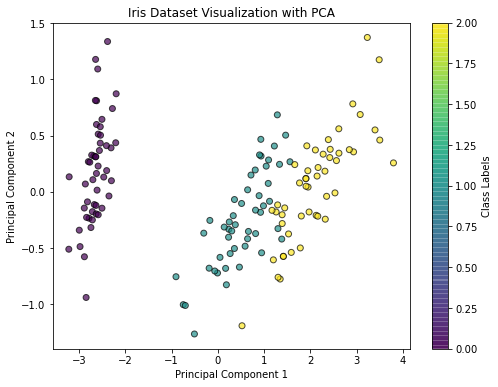

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest Classifier: {accuracy_rf * 100:.2f}%')

# AdaBoost Classifier
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f'Accuracy of AdaBoost Classifier: {accuracy_adaboost * 100:.2f}%')

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy of Gradient Boosting Classifier: {accuracy_gb * 100:.2f}%')

# Voting Classifier (Ensemble of Logistic Regression, Decision Tree, and Random Forest)
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(n_estimators=100))
], voting='hard')
voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy of Voting Classifier: {accuracy_voting * 100:.2f}%')

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Scatter plot of the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset Visualization with PCA')
plt.colorbar(label='Class Labels')
plt.show()
